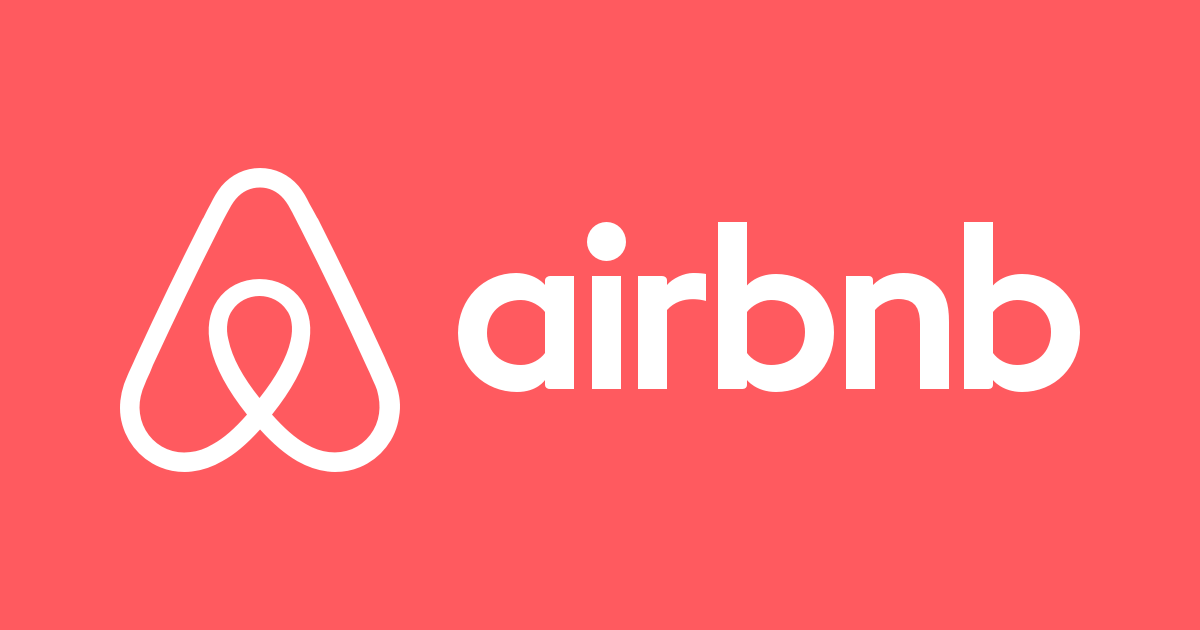

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset

booking_df = pd.read_csv('NY.csv')
booking_df.head()

id                                               name  host_id  \
0  2595  Rental unit in New York · ★4.68 · Studio · 1 b...     2845   
1  5121  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356   
2  6848  Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...    15991   
3  6872  Condo in New York · 1 bedroom · 1 bed · 1 shar...    16104   
4  6990  Rental unit in New York · ★4.88 · 1 bedroom · ...    16800   

       host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0       Jennifer           Manhattan             Midtown  40.75356  -73.98559   
1          Garon            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2  Allen & Irina            Brooklyn        Williamsburg  40.70935  -73.95342   
3            Kae           Manhattan         East Harlem  40.80107  -73.94255   
4            Cyn           Manhattan         East Harlem  40.78778  -73.94759   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    240              30                 49  2022-06-21   
1     Private room     66              30                 50  2019-12-02   
2  Entire home/apt     81              30                191  2023-08-14   
3     Private room     65              30                  1  2022-06-05   
4     Private room     70              30                246  2023-08-14   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.29                               3               339   
1               0.28                               2                88   
2               1.08                               1               142   
3               0.05                               2               359   
4               1.43                               1                93   

   number_of_reviews_ltm license  
0                      0     NaN  
1                      0     NaN  
2                      4     NaN  
3                      0     NaN  
4                      4     NaN

In [3]:
print(f'This dataset has {booking_df.shape} rows and columns respectively.')

This dataset has (39627, 18) rows and columns respectively.


In [4]:
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39627 entries, 0 to 39626
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39627 non-null  int64  
 1   name                            39627 non-null  object 
 2   host_id                         39627 non-null  int64  
 3   host_name                       39612 non-null  object 
 4   neighbourhood_group             39627 non-null  object 
 5   neighbourhood                   39627 non-null  object 
 6   latitude                        39627 non-null  float64
 7   longitude                       39627 non-null  float64
 8   room_type                       39627 non-null  object 
 9   price                           39627 non-null  int64  
 10  minimum_nights                  39627 non-null  int64  
 11  number_of_reviews               39627 non-null  int64  
 12  last_review                     

## 1. Data Preprocessing and Cleaning


In [5]:
booking_df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            15
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11480
reviews_per_month                 11480
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           35268
dtype: int64

In this case, missing data that is observed does not need too much special treatment.The column "license" is irrelevant and insignificant to our data analysis, columns "Host_name","last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; this column is insignificant therefore those values are not needed.

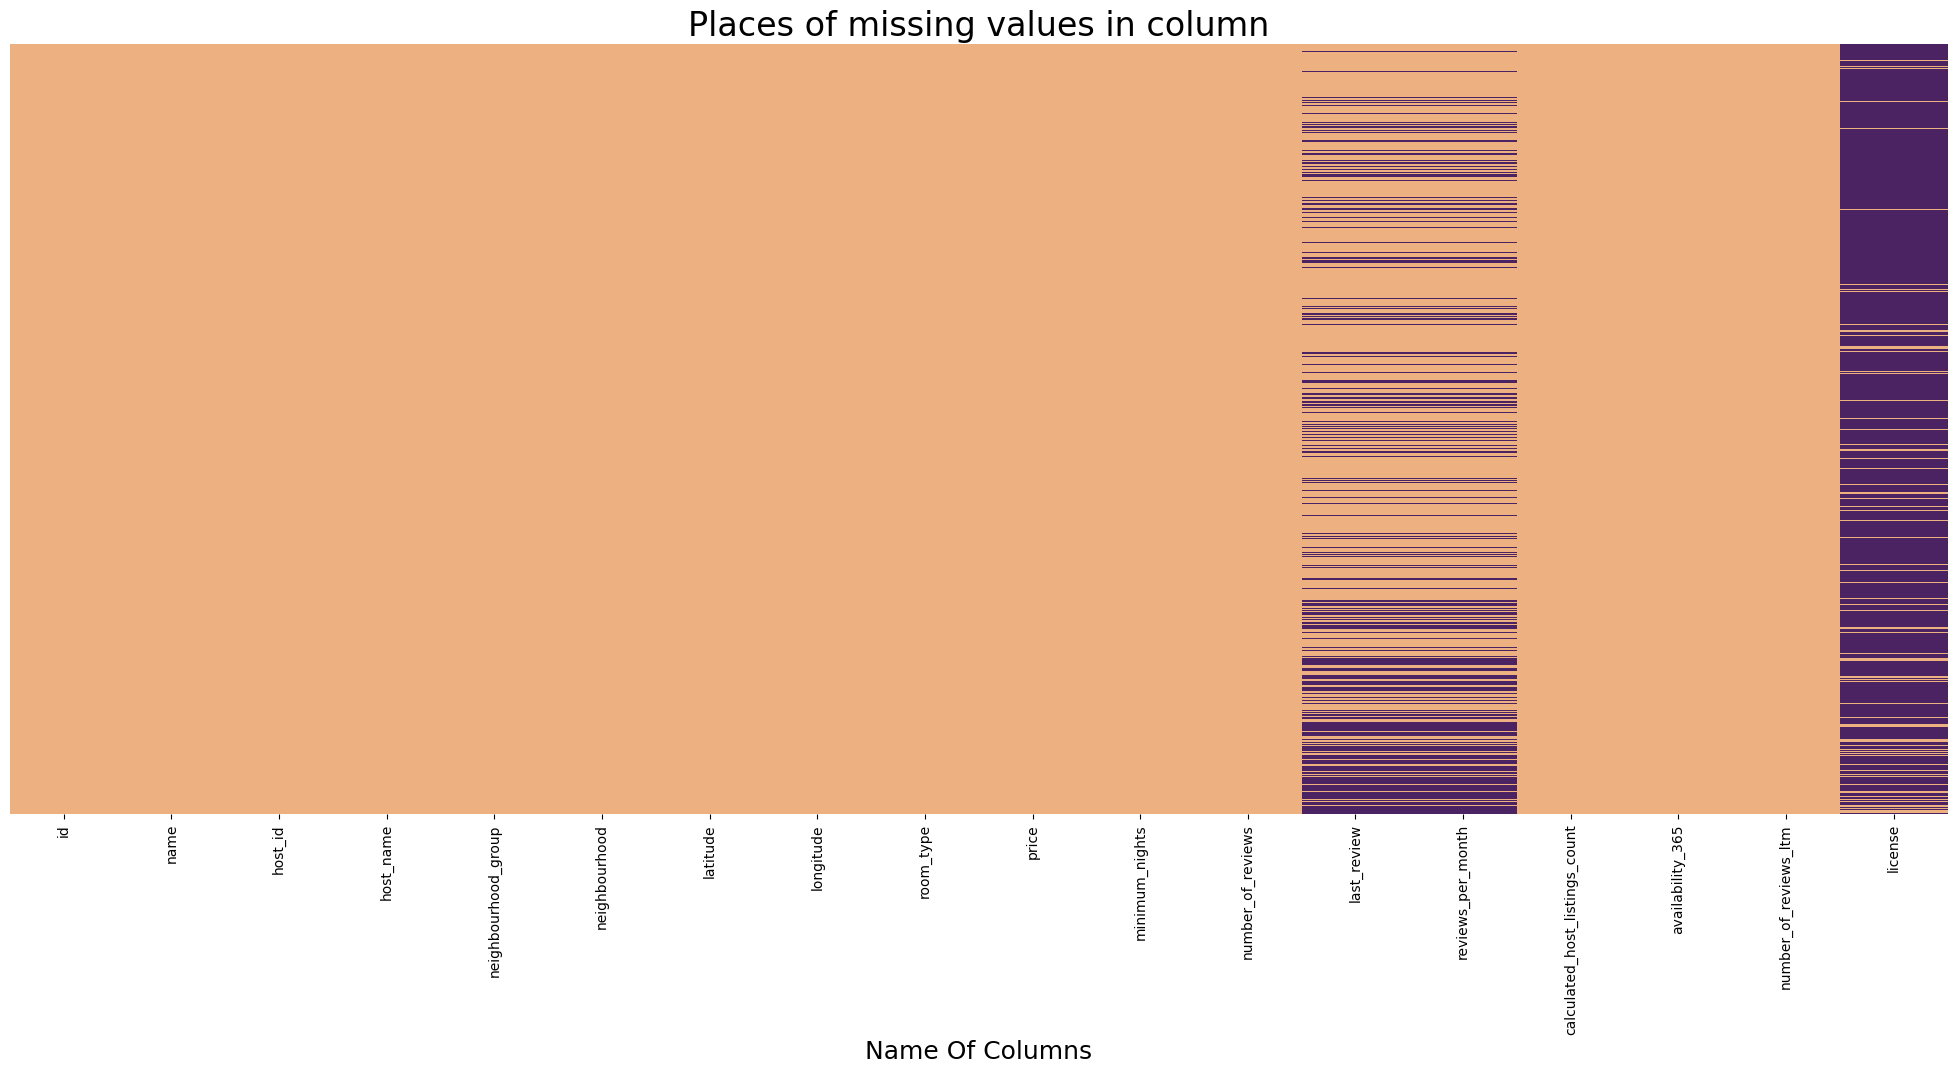

In [6]:
# Visulaizing null values through heatmap.

plt.figure(figsize=(25, 10))
sns.heatmap(booking_df.isnull(), cbar=False, yticklabels=False,cmap='flare')
plt.xlabel("Name Of Columns", fontsize=18)
plt.title("Places of missing values in column", fontsize=24)
plt.show()

**As we can see from above the column 'last_review', 'reviews_per_month', 'license' has the missing values. 'Host name' is not shown as it is just 15 missing values.** 

In [7]:
booking_df.describe()

id       host_id      latitude     longitude         price  \
count  3.962700e+04  3.962700e+04  39627.000000  39627.000000  39627.000000   
mean   3.083450e+17  1.602573e+08     40.729360    -73.946072    208.816464   
std    4.050888e+17  1.717839e+08      0.056425      0.054788    482.380712   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      8.000000   
25%    2.023932e+07  1.692691e+07     40.688980    -73.982785     75.000000   
50%    4.650264e+07  8.066903e+07     40.726520    -73.954090    127.000000   
75%    7.564324e+17  2.857275e+08     40.762667    -73.926560    214.000000   
max    1.037983e+18  5.491316e+08     40.911380    -73.713650  30000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    39627.000000       39627.000000       28147.000000   
mean        30.051127          25.251520           1.021708   
std         29.290027          57.718207           1.716199   
min          1.000000           0.000000           0.010000   
25%         30.000000           0.000000           0.110000   
50%         30.000000           4.000000           0.390000   
75%         30.000000          22.000000           1.415000   
max       1250.000000        1857.000000          71.160000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    39627.000000      39627.000000           39627.000000  
mean                        41.852197        153.721276               6.264088  
std                        124.056880        147.391076              16.602446  
min                          1.000000          0.000000               0.000000  
25%                          1.000000          0.000000               0.000000  
50%                          1.000000        122.000000               0.000000  
75%                          6.000000        319.000000               4.000000  
max                        691.000000        365.000000             983.000000

### **I'm copying the dataframe to keep the original safe and conduct the missing value check and EDA going forward**

In [8]:
booking_df1 = booking_df.copy()

In [9]:
# Checking the duplicates

booking_df1.duplicated().sum()

0

**We have 0 duplicated values**

### **Either we can drop the null values or we can fill it as per the requirement and I'm going to drop the 'ID','License' column as it's not needed for this project and fill the rest of the columns 'host_name', 'last_review', 'reviews_per_month'**

In [10]:
booking_df1.drop(['license','id','number_of_reviews_ltm'] ,axis = 1, inplace = True)
booking_df1.fillna({'host_name' : 'No_Name'}, inplace = True )
booking_df1.fillna({'last_review' : 'Not_Revieved'}, inplace = True )
booking_df1.fillna({'reviews_per_month' : 0}, inplace = True )

In [11]:
booking_df1.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
booking_df1.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**As we can see Missing Value Treatment is done**

In [13]:
print(f'This dataset after preprocessing  has {booking_df1.shape} rows and columns respectively.')

This dataset after preprocessing  has (39627, 15) rows and columns respectively.


There are no changes in the rows of dataset. However since we removed 3 columns, the column size reduced from 18 to 15

## 2 . Exploratory Data Analysis

### **1. What is the most common room types?**

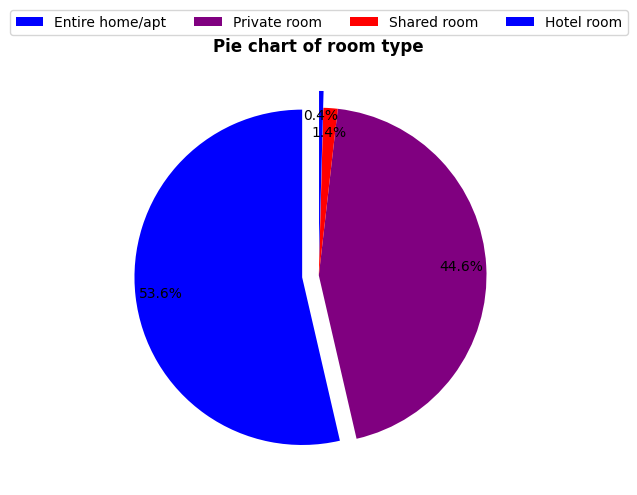

In [14]:
room_type = booking_df1.room_type.value_counts()
explode = (0.1, 0, 0, 0.1)
plt.figure(figsize=(10, 5))

room_type.plot(
    kind='pie',
    title='Most frequent room types',
    fontsize=10,
    explode=explode,
    startangle=90,
    colors=['blue', 'purple', 'red'],
    autopct='%1.1f%%',      # Display percentage values without decimal places
    pctdistance=0.85,        # Set the distance of percentage labels from the center
    labels=None             # Remove labels above slices
)

plt.title('Pie chart of room type', fontweight='bold', pad=10)
plt.ylabel(" ")

plt.legend(room_type.index, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(room_type))

plt.tight_layout()

plt.show()


### **2. Which 'neighbourhood_group' has the highest number of AirBnb's ?**

In [15]:
#checking the unique values of the neighbourhood_group
booking_df1['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

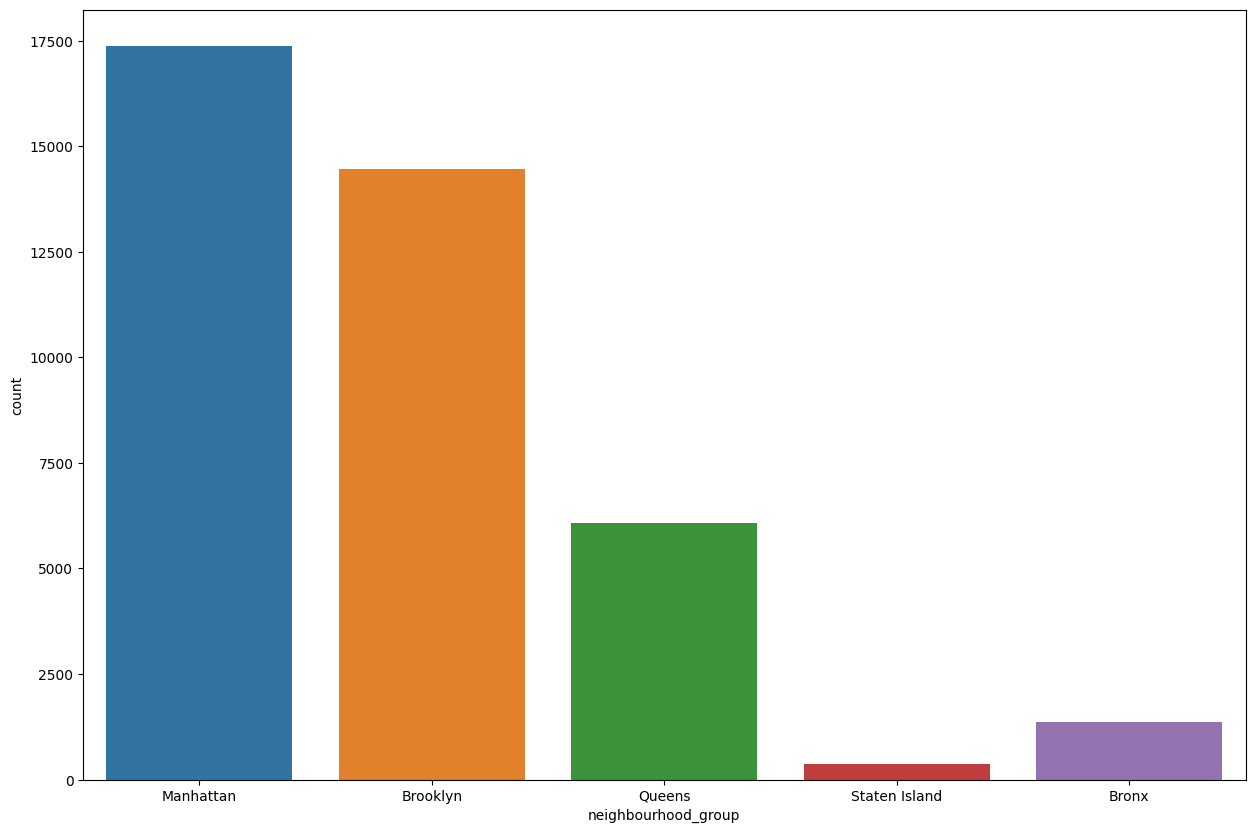

In [16]:
#Plotting the neighbourhood_group
plt.figure(figsize=(15, 10))
sns.countplot(x='neighbourhood_group', data=booking_df1)
plt.show()

**As we can see from the bar chart above Manhattan neighbourhood has the highest number of AirBnb's**

1. Manhattan
2. Brooklyn
3. Queens
4. Bronx
5. Staten Island

And Manhattan and Brooklyn has more than 75% of the AirBnb's.

In [17]:
#Calculating the precise percentage AirBnb's are there in Manhattan and Brooklyn

neighbourhood = booking_df1.groupby('neighbourhood_group')['neighbourhood_group'].count()
neighbourhood = pd.DataFrame(neighbourhood)
neighbourhood.rename(columns = {'neighbourhood_group' : 'No of AirBnbs'}, inplace = True)
neighbourhood

No of AirBnbs
neighbourhood_group               
Bronx                         1355
Brooklyn                     14453
Manhattan                    17367
Queens                        6083
Staten Island                  369

In [18]:
neighbourhood/(sum(neighbourhood['No of AirBnbs'] / 100))

No of AirBnbs
neighbourhood_group               
Bronx                     3.419386
Brooklyn                 36.472607
Manhattan                43.826179
Queens                   15.350645
Staten Island             0.931183



**44% AirBnb's are there in Manhattan and 37 % AirBnB's in Brooklyn**

### **3. Which type of properties are there in all the neighbourhood ?**

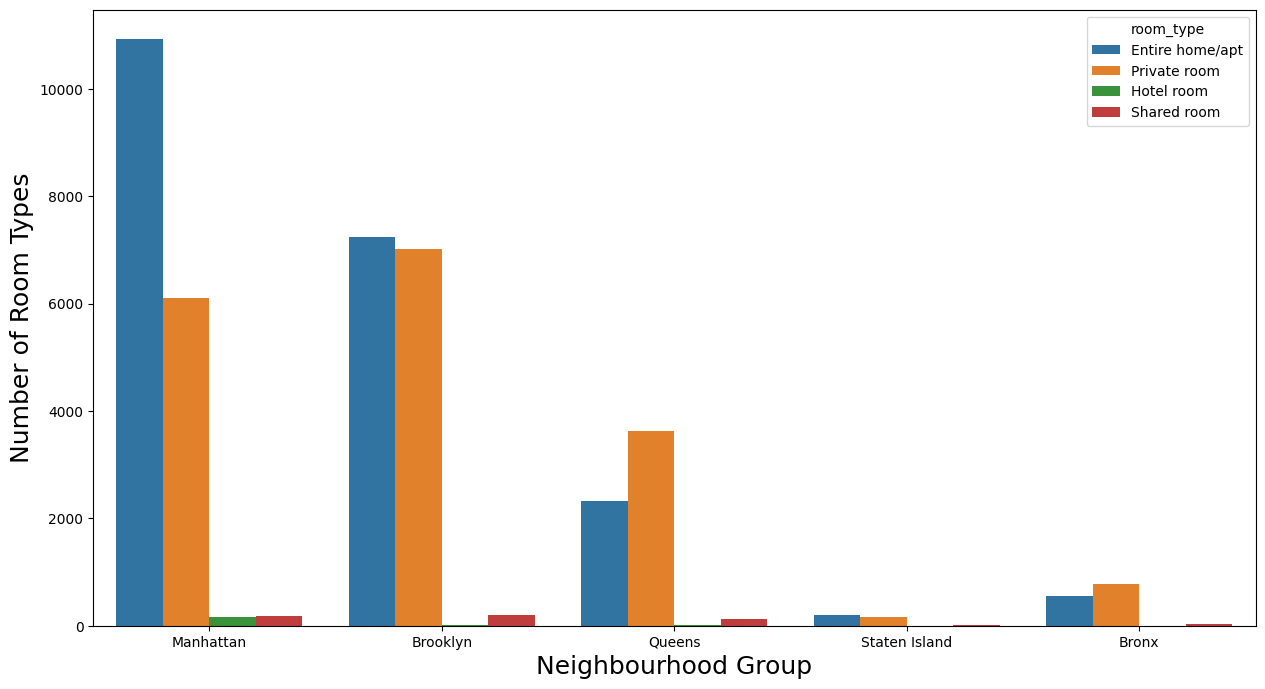

In [19]:
#plotting the Number of Room types available in each states
plt.figure(figsize=(15, 8))
sns.countplot(x='neighbourhood_group', hue='room_type', data=booking_df1)
plt.xlabel('Neighbourhood Group', fontsize=18)
plt.ylabel('Number of Room Types', fontsize=18)
plt.show()

1. **Brooklyn** has Highest number of **Private Rooms**

2. **Manhattan** has Highest number of **Entire Home/Apartment**

3. **Manhattan** has Highest number of **Shared Room**

### **4. Which properties are the busiest Host in terms of Number of Bookings ?**

In [20]:
# return which host has the highest bookings

highest_bookings= booking_df.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

top_ten_highest_bookings= highest_bookings[:10]

top_ten_highest_bookings

neighbourhood_group                                               name  \
6824           Manhattan  Rental unit in New York · 1 bedroom · 1 bed · ...   
2898            Brooklyn  Rental unit in Brooklyn · 1 bedroom · 1 bed · ...   
2900            Brooklyn  Rental unit in Brooklyn · 1 bedroom · 1 bed · ...   
6985           Manhattan  Rental unit in New York · Studio · 1 bed · 1 bath   
6826           Manhattan  Rental unit in New York · 1 bedroom · 1 bed · ...   
6879           Manhattan  Rental unit in New York · 2 bedrooms · 2 beds ...   
8612           Manhattan  Rental unit in New York · ★5.0 · 1 bedroom · 1...   
6842           Manhattan  Rental unit in New York · 1 bedroom · 2 beds ·...   
4484            Brooklyn  Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1...   
8697           Manhattan  Rental unit in New York · ★New · 1 bedroom · 1...   

      Most_Bookings  
6824           2061  
2898           1160  
2900            674  
6985            589  
6826            543  
6879            416  
8612            410  
6842            343  
4484            331  
8697            323

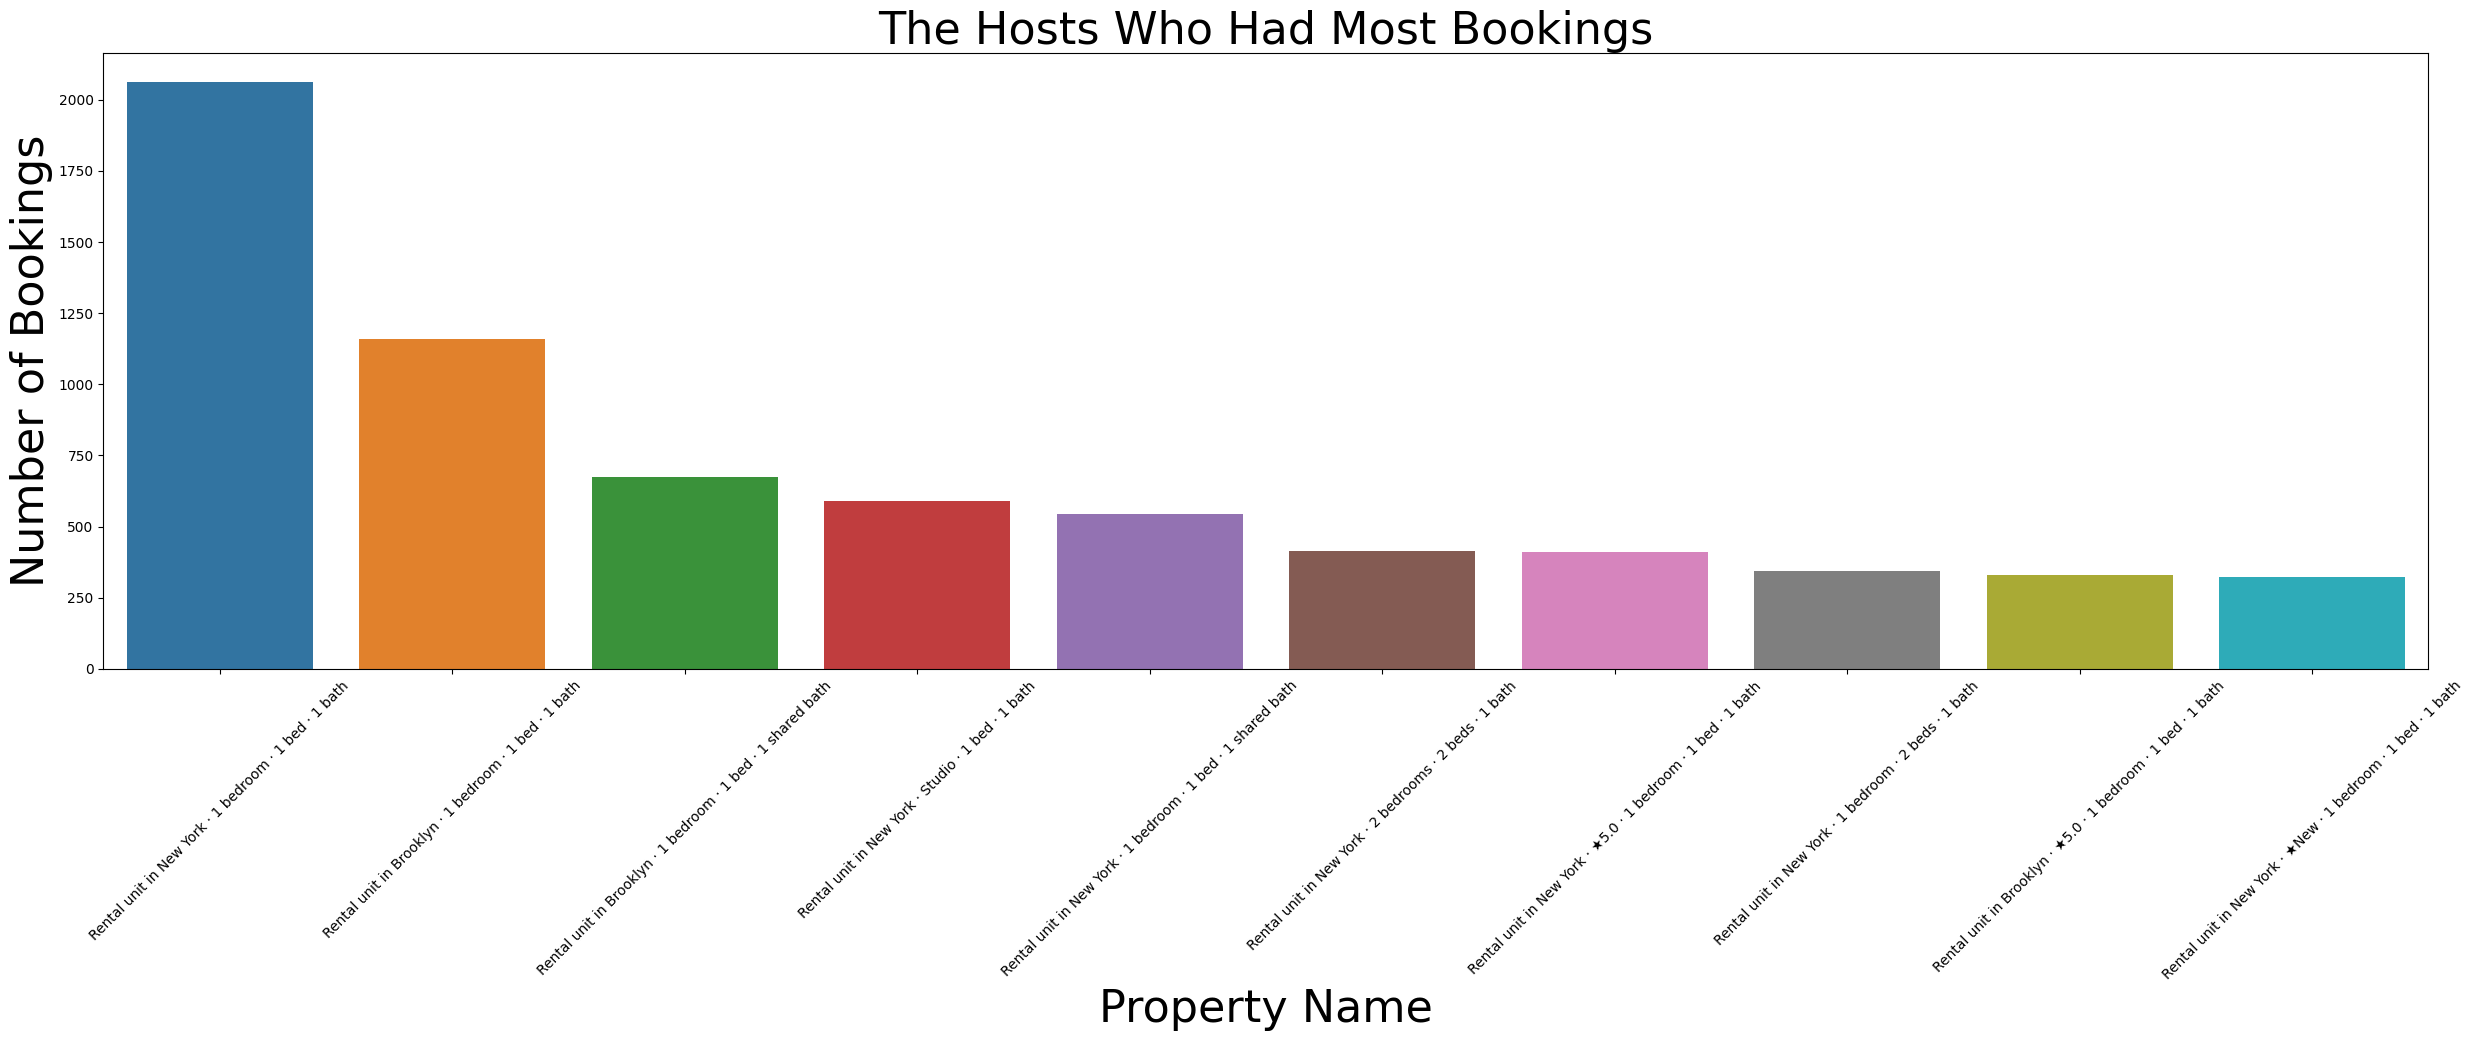

In [21]:
#Visualizaing the top_ten_highest_bookings

plt.figure(figsize=(30,8))
sns.barplot(x = top_ten_highest_bookings['name'],y = top_ten_highest_bookings['Most_Bookings'])
plt.xlabel('Property Name', fontsize = 32)
plt.xticks(rotation =45)
plt.ylabel('Number of Bookings',fontsize = 32)
plt.title("The Hosts Who Had Most Bookings",fontsize = 32)
plt.show()


**As we can see from above Rental unit in New York had the most number of bookings followed by Brooklyn Apartment in Brooklyn and Loft Suite at Brooklyn.** 

### **5. Who are the busiest Host in terms of Number of Bookings with host name ?**

In [22]:
host = booking_df1[['neighbourhood_group','host_name']].value_counts().reset_index().head(10)
host

neighbourhood_group        host_name  count
0           Manhattan       Blueground    648
1           Manhattan        RoomPicks    506
2            Brooklyn           Eugene    471
3           Manhattan             June    318
4           Manhattan  Urban Furnished    281
5              Queens           Hiroki    202
6           Manhattan         Jeniffer    194
7              Queens            Shogo    186
8              Queens           Momoyo    181
9           Manhattan          Michael    177

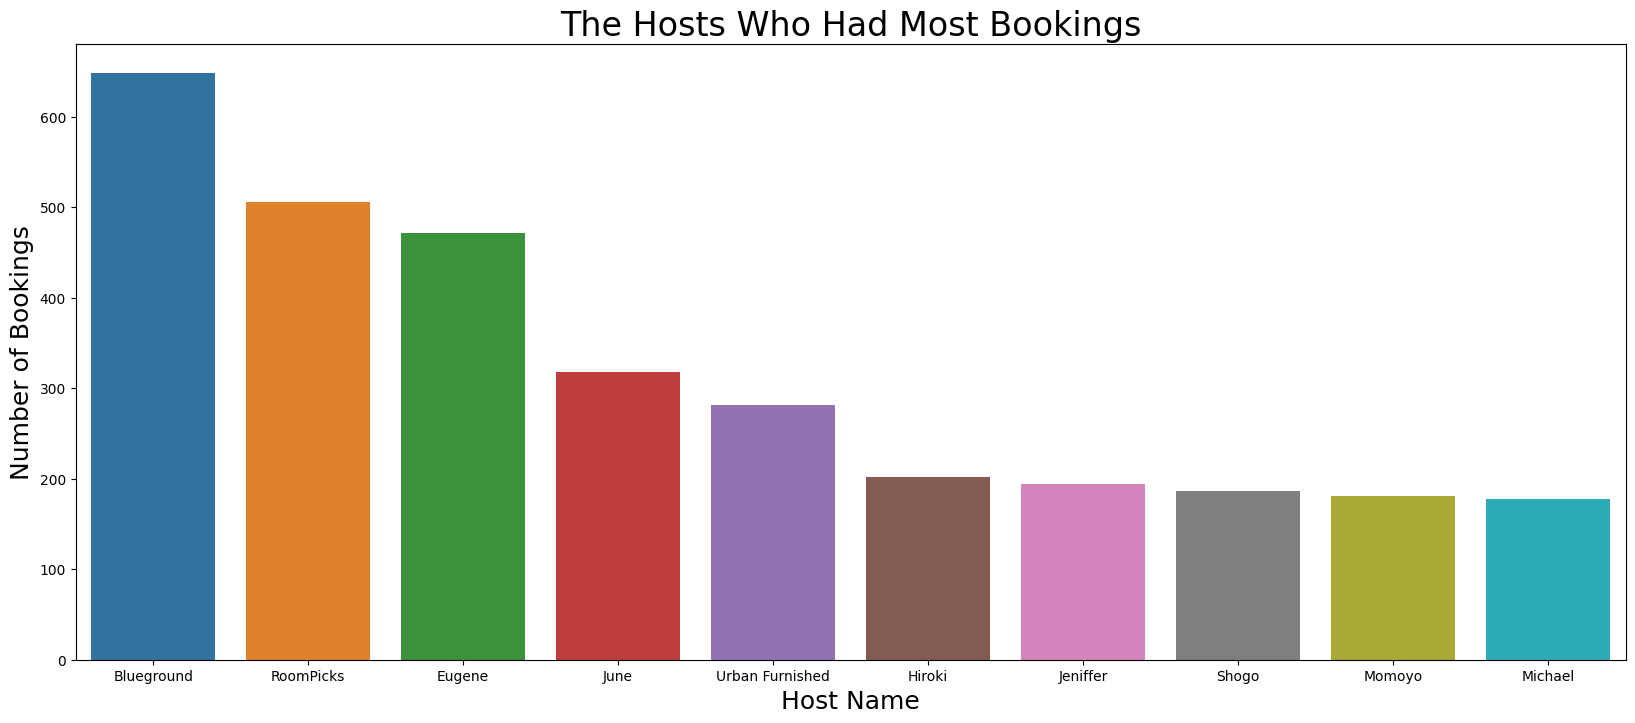

In [23]:
#Visualizaing the busiest Host in terms of Number of Bookings with host name

plt.figure(figsize=(20,8))
sns.barplot(x = host['host_name'], y = host['count'] ,order = host['host_name'])
plt.xlabel('Host Name', fontsize = 18)
plt.ylabel('Number of Bookings',fontsize = 18)
plt.title("The Hosts Who Had Most Bookings",fontsize = 24)
plt.show()

**As we can see from above Blueground at manhattan had the most number of bookings followed by Blueground at manhattan and Michael at manhattan.** 

### **6. What are the average Prices for stays in different neighborhoods group?**

In [24]:
import plotly.express as px

In [25]:
brook_df = booking_df1.loc[booking_df1['neighbourhood_group'].isin(['Brooklyn', 'Manhattan', 'Queens', 'Bronx'])]


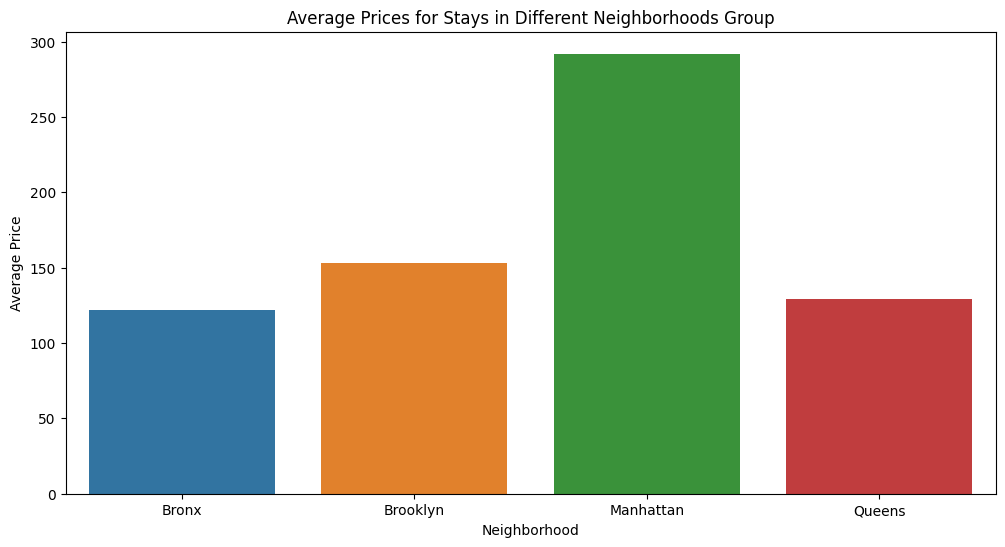

In [26]:
avg_prices = brook_df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Plotting the average prices
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price', data=avg_prices)
plt.title('Average Prices for Stays in Different Neighborhoods Group')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

#### **From the above bar chart we can conclude:**

1. **Brooklyn is not the cheapest nor the costliest neighbourhood to stay**

2. **Manhattan is the costliest place to stay**

3. **Bronx is the cheapest neighbourhood to stay**

### **7. As we see Bronx neighborhood is the cheaper place to stay so which room type can I prefer and area(neighborhood) best to visit at Affordable cost.**

In [27]:
bronx_data = brook_df[brook_df['neighbourhood_group'] == 'Bronx']

# Calculate average price for each neighborhood and room type
bronxavg = bronx_data.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

# Create the plot using Plotly Express directly with 'bronxavg'
fig = px.bar(
    x='neighbourhood',
    y='price',
    data_frame=bronxavg,
    color='room_type',
    barmode='group',
    opacity=0.7,
    color_discrete_map={'Entire home/apt': 'blue', 'Private room': 'green', 'Shared room': 'red'},  # Add this line for color mapping
)

# Update layout
fig.update_layout(
    title='Bronx Room type and Properties to Stay in Bronx at Affordable Cost',
    yaxis_title='Average Price Per Night',
    yaxis=dict(showgrid=False, showticklabels=True),
    autosize=False,
    width=1200,
    height=700,
    legend_title='Room Type',  # Add this line to set legend title
)

# Show the plot
fig.show()

**From the above bar chart we can conclude:**

**1. Riverdale is the most expensive for private room**

**2. Longwood is the most expensive for Entire Home/ Apt**

**3. Cheapest or More Affordable Shared room is available at Westfarm** 

**4. Cheapest or More Affordable Shared room is available at University Height and Bronxdale** 

**5. Cheapest or More Affordable Entire Home/ Apt is available at Huntspoint** 

### **8.As we see Manhattan neighborhood is the cheaper place to stay so which room type can I prefer and area(neighborhood) best to visit at Affordable cost.**

In [28]:
manhattan_data = brook_df.loc[brook_df.neighbourhood_group=='Manhattan']

fig = px.bar(x='neighbourhood',y='price',data_frame = manhattan_data.groupby(['neighbourhood','room_type'])['price'].mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Manhattan Room type and Properties to Stay in Manhattan at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**From the above bar chart we can conclude:**

**1. Tribeca is the most expensive area to stay for Entire Home/ Apt**

**2. Soho is the most expensive area to stay for Private Room**

**3. Murray Hill is the most expensive area to stay for Shared room**

**4. Cheapest or More Affordable Private room is available at Washington Heights** 

**5. Cheapest or More Affordable Shared room is available at Inwood** 

**6. Cheapest or More Affordable Entire Home/ Apt is available at Inwood** 

### **9. Most expensive room type**

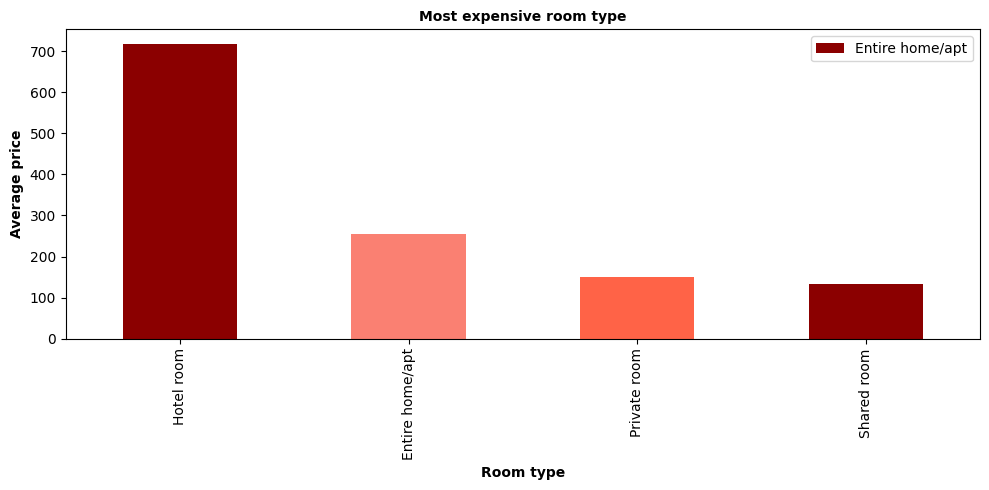

In [29]:
room_type_df1 = booking_df1[['room_type','price']]
#room_type_df.drop_duplicates(subset='id',inplace=True)
room_type = room_type_df1.groupby(by=['room_type'], as_index=False).agg({'price':'mean'}).sort_values('price', ascending=False, ignore_index=True)
room_type.plot(kind='bar', x='room_type', y='price', color=['darkred','salmon','tomato'], figsize=(10,5), fontsize=10)
plt.title('Most expensive room type', fontweight='bold', fontsize=10)
plt.xlabel('Room type', fontweight='bold', fontsize=10)
plt.ylabel('Average price', fontweight='bold', fontsize=10)
plt.legend(booking_df1.room_type, loc='best')
plt.tight_layout()
plt.show()

### **10.What are the top 5 and 10 most reviewed neighbourhoods? **

In [30]:
booking_df1.loc[:,['name','number_of_reviews']].groupby(['name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10].reset_index().rename(columns={'name': "Property Names" })

Property Names  number_of_reviews
0  Rental unit in New York · ★4.88 · 1 bedroom · ...               2979
1  Rental unit in New York · ★5.0 · 1 bedroom · 1...               2864
2  Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1...               2792
3  Rental unit in New York · ★4.89 · 1 bedroom · ...               2180
4  Rental unit in New York · ★4.78 · 1 bedroom · ...               2023
5  Rental unit in New York · ★4.89 · 1 bedroom · ...               1883
6  Rental unit in Brooklyn · ★4.95 · 1 bedroom · ...               1882
7  Boutique hotel in New York · ★4.54 · 1 bedroom...               1857
8  Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1...               1856
9  Rental unit in Brooklyn · ★4.91 · 1 bedroom · ...               1847

In [31]:
review_df = booking_df1[['neighbourhood', 'number_of_reviews']].groupby ('neighbourhood', as_index=False).sum()
review = review_df.sort_values(['number_of_reviews'], ascending=False)
review.head(10)

neighbourhood  number_of_reviews
13   Bedford-Stuyvesant              98694
97               Harlem              59788
217        Williamsburg              53957
53        Crown Heights              36278
28             Bushwick              35055
98       Hell's Kitchen              31360
130             Midtown              29646
66         East Village              25289
205     Upper West Side              22432
63          East Harlem              22038

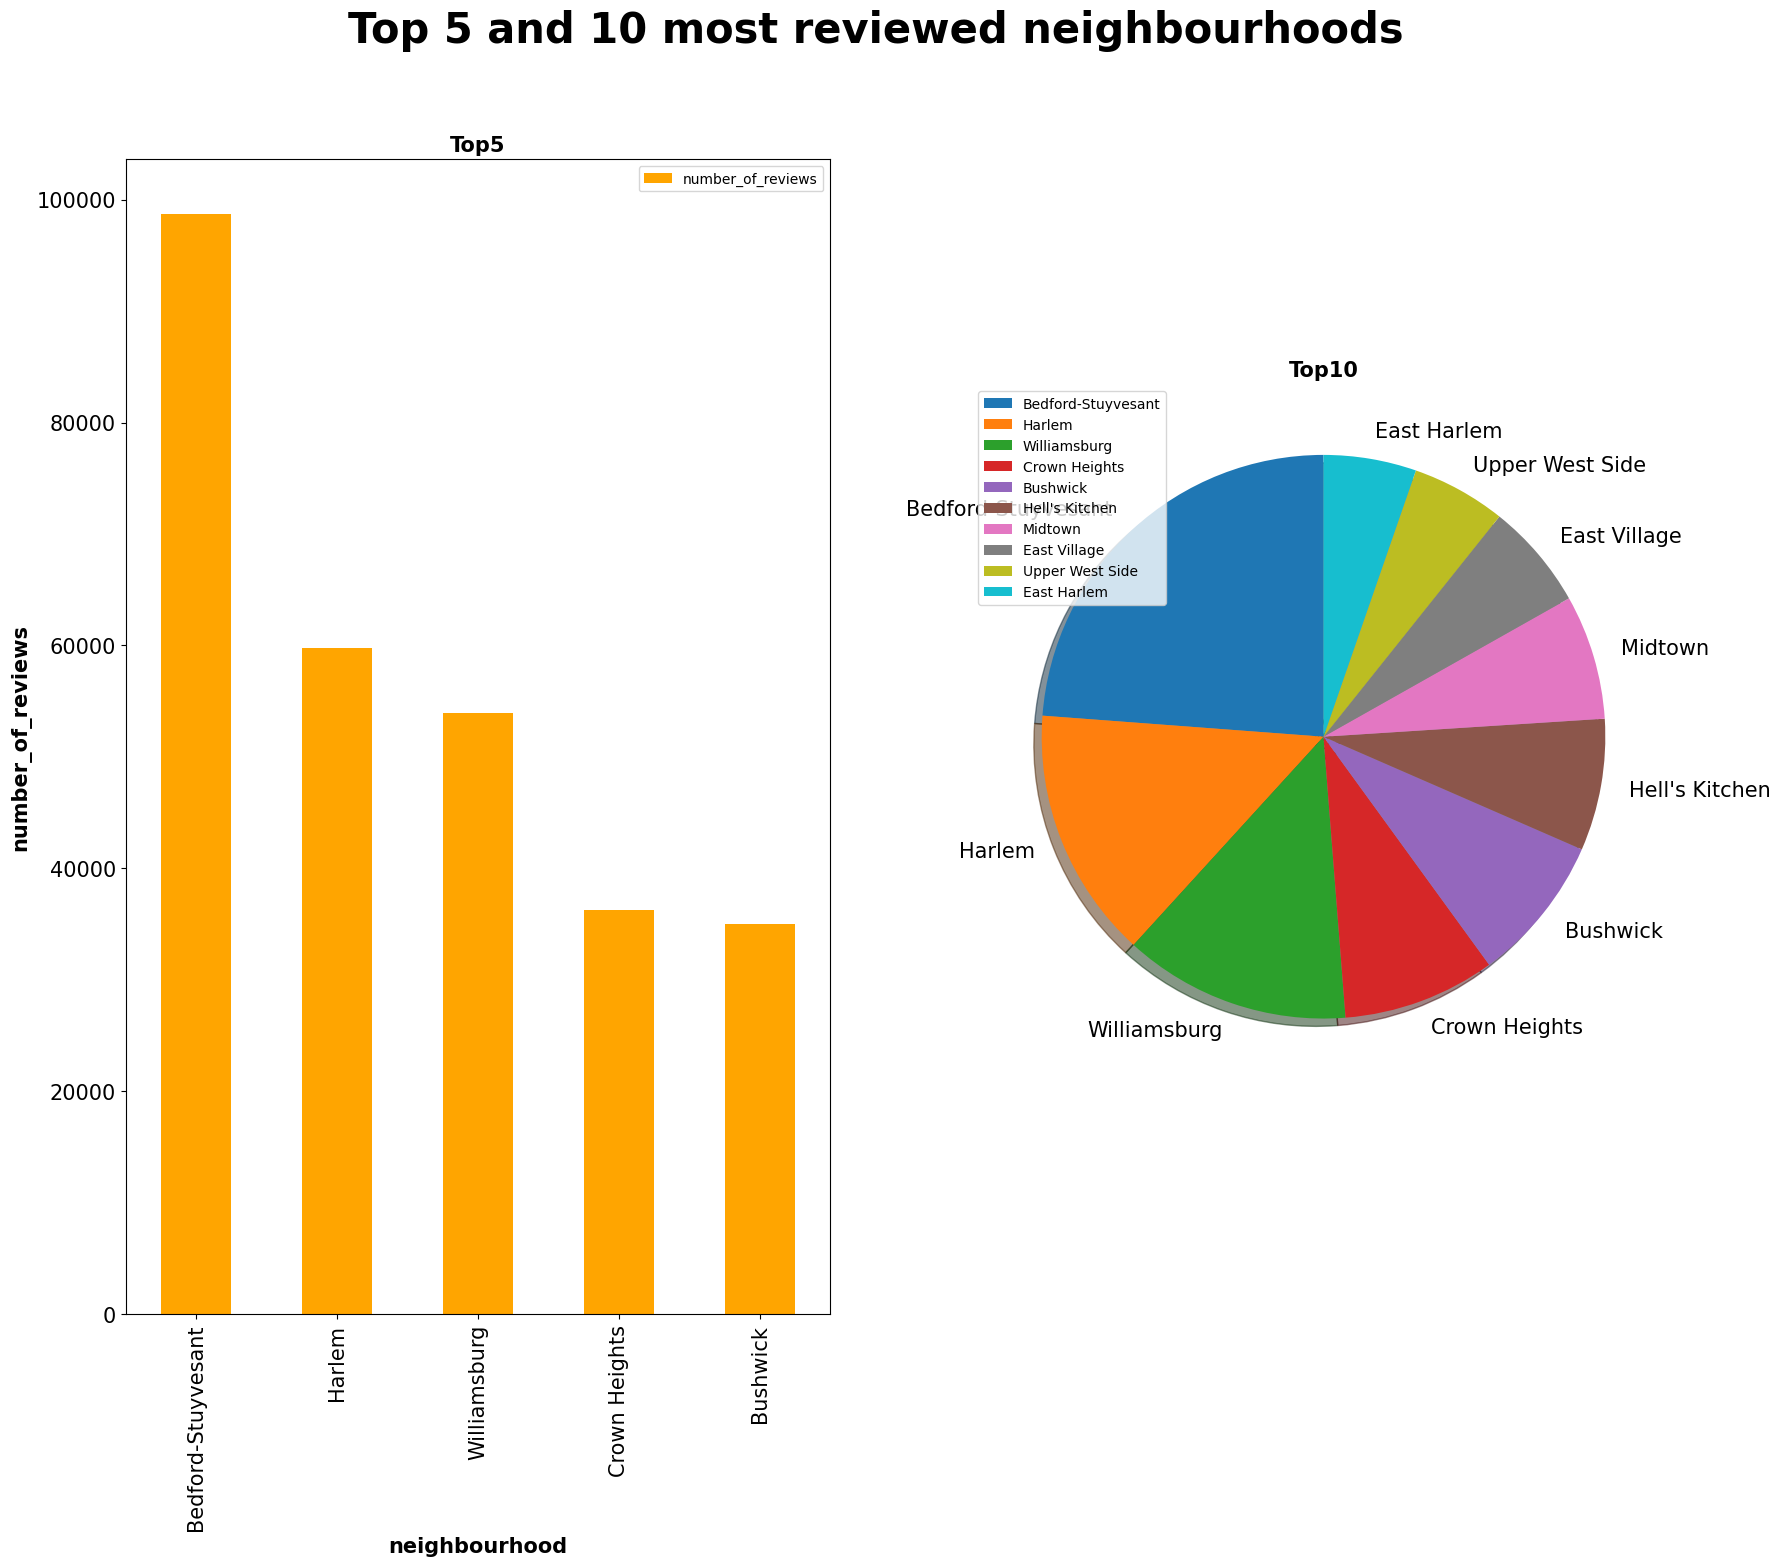

In [32]:
explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0,0)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Top 5 and 10 most reviewed neighbourhoods', fontweight='bold', fontsize=30)

### Top5
review.head(5).plot.bar(x='neighbourhood', y='number_of_reviews', color='orange', figsize=(20,15), fontsize=15, ax=ax1)
ax1.set_title('Top5', fontweight='bold', fontsize=15)
ax1.set_xlabel('neighbourhood', fontweight='bold', fontsize=15)
ax1.set_ylabel('number_of_reviews', fontweight='bold', fontsize=15)

### Top10
review.head(10).plot(kind='pie', x='neighbourhood', y='number_of_reviews', figsize=(20,15), fontsize=15, startangle=90, shadow=True, labels=review.neighbourhood, ax=ax2)
ax2.set_title('Top10', fontweight='bold', fontsize=15)
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')

fig.subplots_adjust(hspace=1.0)

In [33]:
review

neighbourhood  number_of_reviews
13           Bedford-Stuyvesant              98694
97                       Harlem              59788
217                Williamsburg              53957
53                Crown Heights              36278
28                     Bushwick              35055
..                          ...                ...
119                 Little Neck                  3
9    Bay Terrace, Staten Island                  1
35       Chelsea, Staten Island                  1
84               Fort Wadsworth                  0
144                    New Dorp                  0

[224 rows x 2 columns]

**Top 5 most reviewed neighborhoods are :**

Bedford-Stuyvesant
Harlem
Williamsburg
Crown Heights
Bushwick	

### **11. Who has the potential to open an AirBnb franchise in Queens in coming days, consider the most number of reviews as metric?** 

In [34]:
booking_df1.head(3)

name  host_id      host_name  \
0  Rental unit in New York · ★4.68 · Studio · 1 b...     2845       Jennifer   
1  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356          Garon   
2  Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...    15991  Allen & Irina   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2            Brooklyn        Williamsburg  40.70935  -73.95342   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    240              30                 49  2022-06-21   
1     Private room     66              30                 50  2019-12-02   
2  Entire home/apt     81              30                191  2023-08-14   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.29                               3               339  
1               0.28                               2                88  
2               1.08                               1               142

In [35]:
booking_df1.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [36]:
booking_df1['last_review'] = pd.to_datetime(booking_df1['last_review'], errors='coerce')

In [37]:
property_df = booking_df1.copy()
property_df['duration'] = round((property_df['number_of_reviews']/property_df['reviews_per_month']) / 12)
property_df['possible_year_of_start'] = property_df['last_review'].dt.year - property_df['duration']
property_df['possible_year_of_start'] = pd.to_datetime(property_df['possible_year_of_start'], format = '%Y').dt.year

In [38]:
num_of_property_df = booking_df1.loc[:,['host_id','host_name']].groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})

In [39]:
booking_df1.groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})

number_of_property
host_id                      
107434423                 691
3223938                   563
305240193                 364
496944100                 289
19303369                  266
...                       ...
22440410                    1
22432953                    1
22414947                    1
22410033                    1
549131589                   1

[24056 rows x 1 columns]

In [40]:
#DataFrame to caputure the data for total number of property holding of Hosts in reviewed_df

num_of_property_df = property_df.groupby('host_id').agg({'host_name':'count'}).sort_values(by='host_name',ascending=False).rename(columns={'host_name':'number_of_property'})
df = property_df.copy()
property_df = df.merge(num_of_property_df,how='inner',on='host_id')

In [41]:
property_df.head()

name  host_id host_name  \
0  Rental unit in New York · ★4.68 · Studio · 1 b...     2845  Jennifer   
1  Rental unit in New York · Studio · 1 bed · 1 bath     2845  Jennifer   
2  Rental unit in New York · ★5.0 · Studio · 1 be...     2845  Jennifer   
3  Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...     7356     Garon   
4  Rental unit in Brooklyn · ★4.56 · 1 bedroom · ...     7356     Garon   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1           Manhattan      Hell's Kitchen  40.75534  -73.99223   
2           Manhattan      Hell's Kitchen  40.75426  -73.99227   
3            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
4            Brooklyn  Bedford-Stuyvesant  40.68777  -73.94976   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    240              30                 49  2022-06-21   
1  Entire home/apt    240              30                  2  2020-03-31   
2  Entire home/apt    240              30                  3  2023-03-03   
3     Private room     66              30                 50  2019-12-02   
4     Private room     70              30                 59  2022-06-01   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.29                               3               339   
1               0.03                               3               365   
2               0.13                               3               365   
3               0.28                               2                88   
4               0.35                               2                 0   

   duration  possible_year_of_start  number_of_property  
0      14.0                  2008.0                   3  
1       6.0                  2014.0                   3  
2       2.0                  2021.0                   3  
3      15.0                  2004.0                   2  
4      14.0                  2008.0                   2

In [42]:
busiest_host_queens = property_df.loc[property_df.neighbourhood_group=='Queens',['host_id','host_name','number_of_property','reviews_per_month','availability_365','price']].groupby(['host_id','host_name']).agg({'reviews_per_month':'sum','number_of_property':'count','availability_365':'median','price':'min'}).sort_values(by=['reviews_per_month','number_of_property','availability_365'],ascending=[False,False,False]).reset_index()[:20]
busiest_host_queens

host_id     host_name  reviews_per_month  number_of_property  \
0   219517861  Sonder (NYC)              55.76                  11   
1    74488815         Karen              53.48                  16   
2   228879817         Cindy              40.18                  15   
3   381374171       Ramneet              35.32                   4   
4   231138233         Filiz              33.69                   8   
5   137358866           Kaz              25.47                 101   
6     5735865          Jane              24.43                  14   
7   433203831         Vicky              24.13                   6   
8   205745676         Liqin              22.55                   8   
9    92900025        Amanda              22.20                   2   
10  342002500          Rian              21.85                   5   
11   10194781         Bruce              21.81                  10   
12  388056806         Jakob              20.93                   3   
13  156948703          Asad              19.68                   3   
14  505240543      Jamerson              19.31                   8   
15  161899037          Tony              18.18                   7   
16  462961904         Meraj              18.16                   7   
17  149431096   Jhon Andres              17.88                   2   
18  200239515         Shogo              17.83                 186   
19   19303369        Hiroki              17.61                 202   

    availability_365  price  
0              246.0    312  
1              363.0     52  
2              354.0     51  
3              141.5     70  
4                0.5     53  
5              321.0     33  
6              244.0     52  
7              363.5     60  
8              318.5     98  
9              358.0    101  
10             365.0     39  
11             350.0     90  
12              59.0     55  
13             365.0     49  
14             287.0     26  
15              90.0    149  
16              80.0    143  
17             182.5     45  
18              12.0     22  
19               0.0     19

In [43]:
property_df['year_of_review'] = property_df['last_review'].dt.year

In [44]:
# Which neighbourhood is has incremental reviews YoY for Queens

dct1 = {}

for group in property_df.loc[property_df.neighbourhood_group=='Queens'].neighbourhood.unique():
  lst1 = []
  for year in list(range(2014, 2020)):
    avg_reviews_sum = property_df[(property_df['neighbourhood'] == group) & (property_df['year_of_review'] == year)]['reviews_per_month'].sum()
    lst1.append(avg_reviews_sum)
  dct1.update({group : lst1})
dct1
avg_review_df = pd.DataFrame(dct1, index=range(2014,2020))
avg_review_df

Long Island City  Woodside  Sunnyside  Ridgewood  Middle Village  \
2014              0.02      0.00       0.00       0.00            0.00   
2015              0.38      0.03       0.05       0.32            0.21   
2016              0.76      0.06       0.78       0.04            0.01   
2017              0.24      0.14       0.42       0.41            0.00   
2018              1.72      0.50       1.63       0.60            0.06   
2019              1.67      3.47       4.79       2.42            0.10   

      Ditmars Steinway  Jamaica  Astoria  Jackson Heights  Rockaway Beach  \
2014              0.03     0.00     0.24             0.76            0.12   
2015              0.02     0.00     0.56             0.00            0.00   
2016              0.26     0.00     1.48             0.01            0.01   
2017              0.15     0.12     0.98             0.08            0.00   
2018              1.01     0.60     4.60             0.30            0.00   
2019              2.57     4.00     9.95             2.94            1.04   

      ...  St. Albans  Rosedale  Cambria Heights  Whitestone  Neponsit  \
2014  ...        0.00      0.00             0.00        0.00       0.0   
2015  ...        0.00      0.00             0.00        0.00       0.0   
2016  ...        0.00      0.00             0.00        0.00       0.0   
2017  ...        0.00      0.00             1.43        0.00       0.0   
2018  ...        0.02      0.02             0.00        0.00       0.0   
2019  ...        2.16      0.02             0.00        0.02       0.0   

      Breezy Point  Bayswater  Douglaston  Jamaica Hills  Belle Harbor  
2014           0.0        0.0         0.0           0.00           0.0  
2015           0.0        0.0         0.0           0.00           0.0  
2016           0.0        0.0         0.0           0.00           0.0  
2017           0.0        0.0         0.0           0.00           0.0  
2018           0.0        0.0         0.0           0.00           0.0  
2019           0.0        0.0         0.0           0.28           0.0  

[6 rows x 51 columns]

In [45]:
# Top 10 reviewed in Queens

avg_review_queens = avg_review_df.sum().sort_values(ascending=False)[:10].reset_index().rename(columns = {'index' : 'Properties Names', 0 : 'Average Reviews'})
avg_review_queens

Properties Names  Average Reviews
0           Astoria            17.81
1          Flushing            10.70
2         Woodhaven             7.86
3         Sunnyside             7.67
4          Elmhurst             5.57
5      Forest Hills             5.23
6  Long Island City             4.79
7           Maspeth             4.78
8           Jamaica             4.72
9          Woodside             4.20

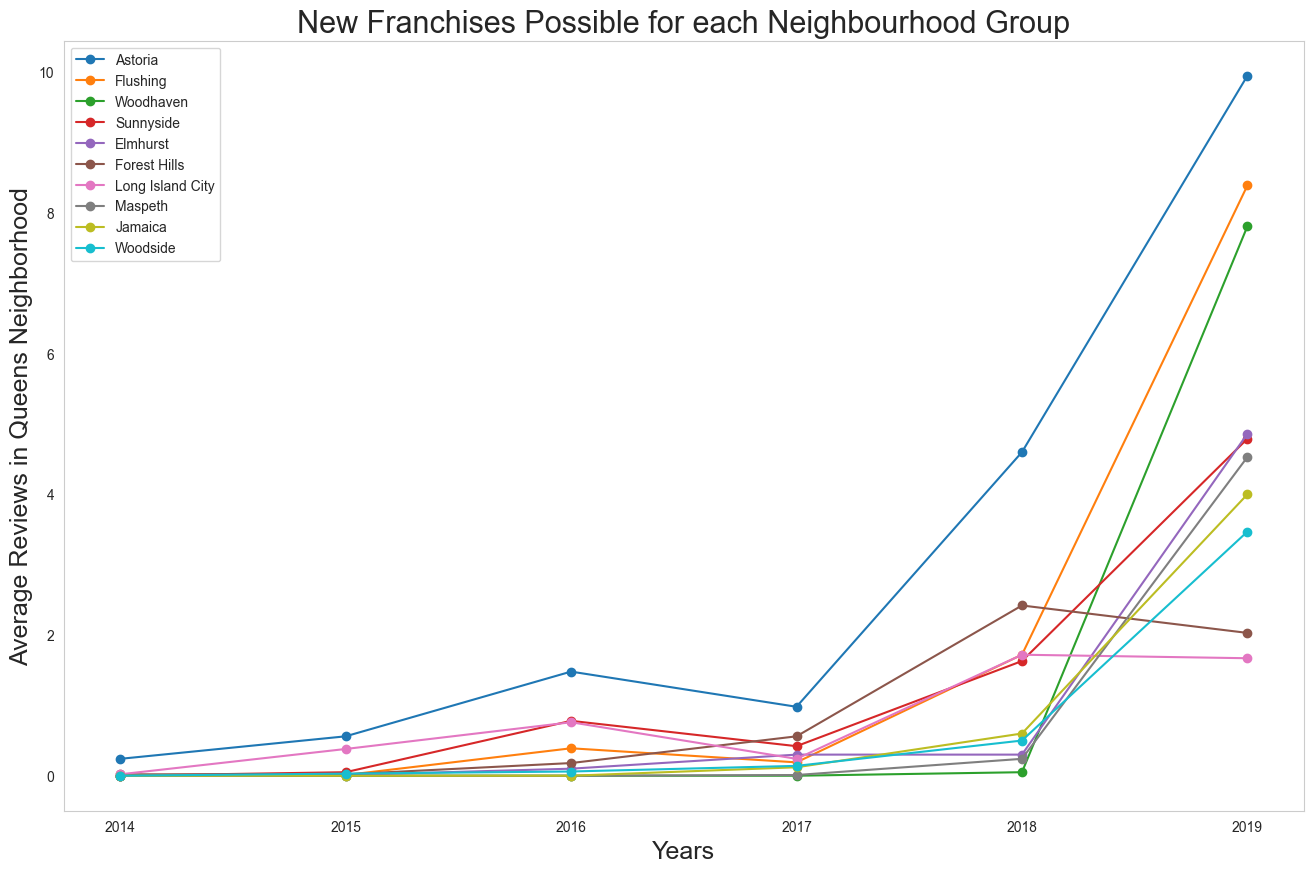

In [46]:
plt.rcParams['figure.figsize'] = (16,10)
sns.set_style('whitegrid')
for average in avg_review_queens['Properties Names']:
  avg_review_df[average].plot(marker='o')
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Average Reviews in Queens Neighborhood', fontsize = 18)
plt.title('New Franchises Possible for each Neighbourhood Group', fontsize = 22)
plt.locator_params(axis="y", nbins=10)
plt.grid()
plt.legend(loc='upper left')
plt.show()

**We observe that top 3 reviewed neighbourhoods are :**

**Astoria** 

**Flushing**

**Woodhaven**

**So, The Hosts with property listings over these neighbourhoods of Queens are more likely to have a new franchise in the near future.**

### **12. Word cloud of the words used names of the Airbnbs**

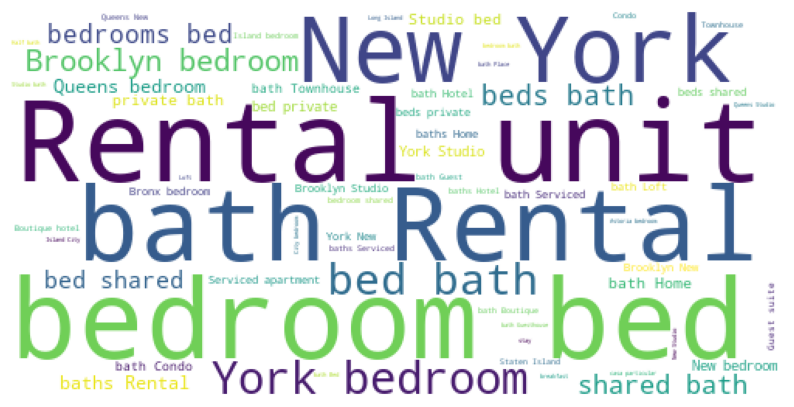

In [47]:
from wordcloud import WordCloud
name1 = " ".join(str(w) for w in booking_df1.name)
plt.subplots(figsize=(10,20))
wordcloud = WordCloud(background_color='white', height=250, width=500, max_words=60).generate(name1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **13. Plot the Airbnb Spatial Data on New York City Map**

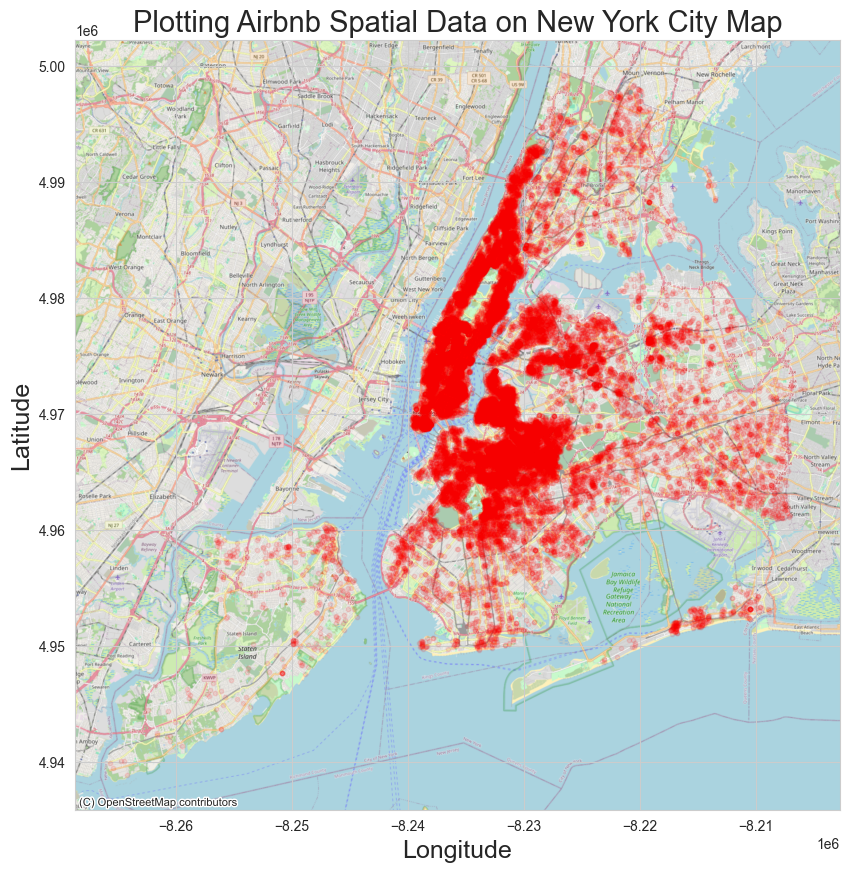

In [48]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Assuming 'booking_df1' is a DataFrame with 'longitude' and 'latitude' columns
gdf = gpd.GeoDataFrame(booking_df1, geometry=gpd.points_from_xy(booking_df1.longitude, booking_df1.latitude))

# Set the CRS to WGS 84 (EPSG:4326)
gdf.crs = "EPSG:4326"

# Convert coordinates to Web Mercator (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.1)

# Set title and labels
ax.set_title('Plotting Airbnb Spatial Data on New York City Map', fontsize=21)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)

# Add background map using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

plt.show()


**The above Map shows all the Airbnb Properties of the dataset in New York City.**

### **14. Plot the 50 Busiest Airbnb properties on the New York City Map**

In [49]:
busiest_50_df = gdf.sort_values('reviews_per_month', ascending= False).head(50)
busiest_50_df

name    host_id  \
24229  Hotel in New York · ★4.42 · 1 bedroom · 1 bed ...  435369966   
33455  Bed and breakfast in Manhattan · ★4.72 · 1 bed...  503712643   
27935  Loft in New York · ★4.60 · 1 bedroom · 1 bed ·...  470859718   
18245  Boutique hotel in New York · ★4.59 · Studio · ...  340038896   
21173  Hotel in New York · ★4.66 · 1 bedroom · 1 bed ...  397872858   
22646  Hotel in New York · ★4.36 · 1 bedroom · 1 bed ...  417166424   
21198  Hotel in New York · ★4.65 · 1 bedroom · 2 beds...  397872858   
15951  Boutique hotel in New York · ★4.54 · 1 bedroom...  266755066   
22454  Rental unit in New York · ★4.89 · 1 bedroom · ...  158969505   
25476  Hostel in New York · ★4.44 · 1 bedroom · 1 bed...   16677326   
28125  Loft in New York · ★4.54 · 1 bedroom · 1 bed ·...  470859718   
21203  Hotel in New York · ★4.70 · 1 bedroom · 1 bed ...  397872858   
22644  Hotel in New York · ★4.32 · 1 bedroom · 2 beds...  417166424   
23548  Rental unit in New York · ★4.92 · 1 bedroom · ...  158969505   
18247  Boutique hotel in New York · ★4.56 · 1 bedroom...  340038896   
23323  Aparthotel in New York · ★4.79 · Studio · 2 be...  420415528   
15949  Boutique hotel in New York · ★4.41 · 1 bedroom...  266755066   
25771  Boutique hotel in New York · ★4.55 · Studio · ...  219517861   
22738  Hotel in New York · ★4.24 · 1 bedroom · 1 priv...  417166424   
27327  Hotel in New York · ★4.71 · Studio · 1 bed · 1...  468527022   
32916  Bed and breakfast in Queens · ★4.88 · 1 bedroo...  149431096   
15453  Boutique hotel in New York · ★4.30 · 1 bedroom...  266533448   
26796  Boutique hotel in Long Island City · ★4.62 · S...  219517861   
37864  Rental unit in New York · ★4.68 · 1 bedroom · ...  470044067   
14795  Hotel in New York · ★4.59 · 1 bedroom · 1 bed ...  259169672   
25777  Hotel in Brooklyn · ★4.29 · Studio · 1 bed · 1...  422234306   
28083  Loft in New York · ★4.48 · 1 bedroom · 2 beds ...  470859718   
25403  Hotel in New York · ★4.20 · 1 bedroom · 1 bed ...  449715737   
14884  Boutique hotel in New York · ★4.57 · 1 bedroom...  257995608   
20558  Boutique hotel in New York · ★4.57 · Studio · ...  219517861   
31373  Rental unit in New York · ★4.23 · 1 bedroom · ...  479247124   
19672  Rental unit in New York · ★4.75 · Studio · 2 b...  219517861   
29297  Rental unit in New York · ★4.64 · Studio · 2 b...  446770142   
26283  Rental unit in Queens · ★4.67 · 1 bedroom · 1 ...  242322561   
20183  Home in Queens · ★4.41 · 1 bedroom · 1 bed · 1...  381374171   
15585  Boutique hotel in New York · ★4.77 · 1 bedroom...  270122518   
24130  Rental unit in Brooklyn · ★4.91 · 1 bedroom · ...  435341575   
21860  Hotel in New York · ★3.95 · 1 bedroom · 1 bed ...  401277068   
14891  Boutique hotel in New York · ★4.57 · 1 bedroom...  257995608   
29755  Guest suite in Queens · ★4.99 · 1 bedroom · 1 ...   92900025   
29577  Hotel in New York · ★4.69 · Studio · 1 bed · 1...   88566861   
36744  Rental unit in New York · ★4.71 · Studio · 1 b...  219517861   
28089  Loft in New York · ★4.56 · 1 bedroom · 1 bed ·...  470859718   
22956  Home in Queens · ★4.98 · 1 bedroom · 1 bed · 1...   92900025   
21226  Home in Brooklyn · ★4.96 · 2 bedrooms · 2 beds...  393283611   
15335  Boutique hotel in New York · ★4.66 · 1 bedroom...  231281049   
22643  Hotel in New York · ★4.35 · 1 bedroom · 1 bed ...  417166424   
22855  Hotel in Brooklyn · ★4.08 · 1 bedroom · 1 bed ...  422234306   
36739  Rental unit in New York · ★4.42 · Studio · 1 b...  219517861   
28700  Rental unit in Queens · ★4.98 · 1 bedroom · 2 ...  476462867   

                            host_name neighbourhood_group       neighbourhood  \
24229             Millennium Downtown           Manhattan  Financial District   
33455                          Alfred           Manhattan             Chelsea   
27935                         SoHoBlu           Manhattan           Chinatown   
18245              Millennium Premier           Manhattan    Theater District   
21173                    

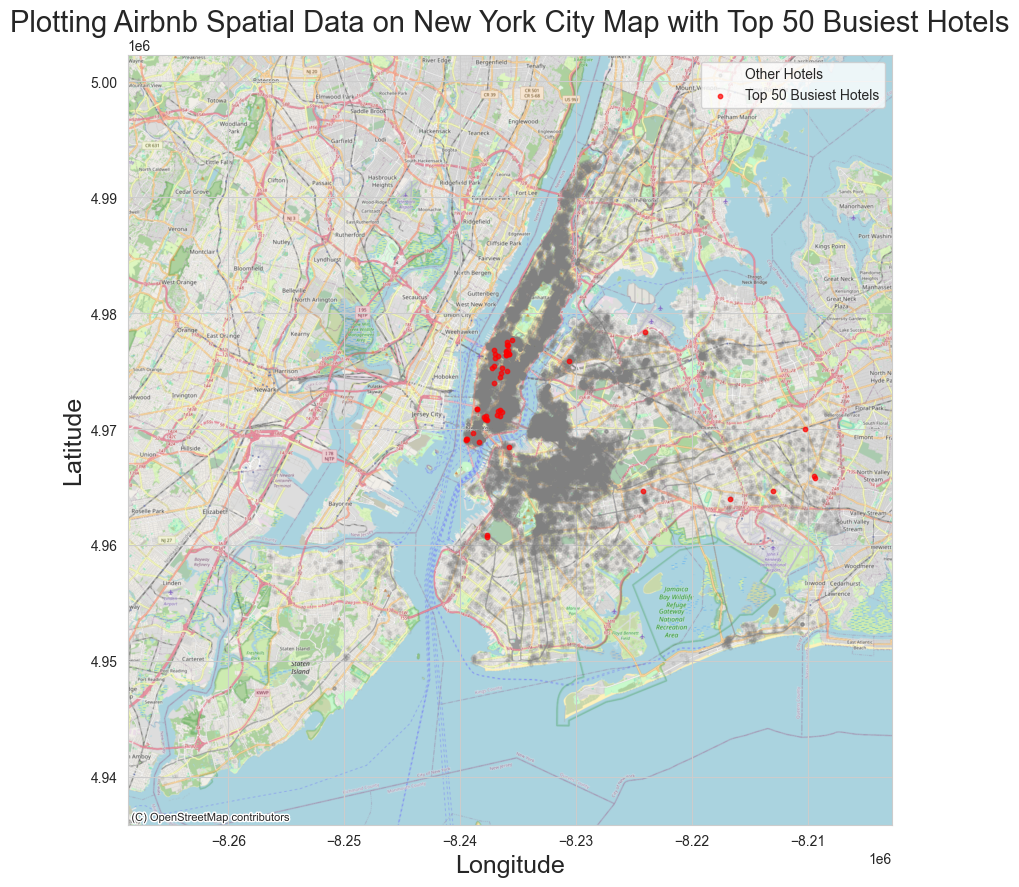

In [50]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Plot all hotels in grey
gdf.plot(ax=ax, marker='o', color='grey', markersize=5, alpha=0.1, label='Other Hotels')

# Plot the top 50 busiest hotels in red
busiest_50_df.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7, label='Top 50 Busiest Hotels')

# Set title and labels
ax.set_title('Plotting Airbnb Spatial Data on New York City Map with Top 50 Busiest Hotels', fontsize=21)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)

# Add background map using contextily
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Add legend
ax.legend()

plt.show()

**The above Map shows the top 50 Busiest Airbnb properties in the New York City**